# Ce notebook est la version developper du projet ou je traite plus en détails mon jeu de donnée

    Importer les librairies necessaires 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import os
import sys

# Importation de la base de données

In [2]:
current_dir=os.getcwd()
print(f"current_dir : {current_dir}")
project_root= os.path.abspath(os.path.join(current_dir,'..'))
print(f'project_root : {project_root}')

data_path=os.path.join(project_root,'data')
print(f'data_path : {data_path}')


current_dir : /Users/hamadoundoucoure/Documents/GitHub Project/Data-Analyse-Project/ML insurance scoring/notebooks
project_root : /Users/hamadoundoucoure/Documents/GitHub Project/Data-Analyse-Project/ML insurance scoring
data_path : /Users/hamadoundoucoure/Documents/GitHub Project/Data-Analyse-Project/ML insurance scoring/data


In [3]:
assu_path = os.path.join(data_path,'assurance_vie.csv')
assu_path

'/Users/hamadoundoucoure/Documents/GitHub Project/Data-Analyse-Project/ML insurance scoring/data/assurance_vie.csv'

In [4]:
assu = pd.read_csv(assu_path)
assu.head(10)

,Asvi,AsviR,Sexe,Age,Tage,Couple,Vmatri,Diplome,Occupa,Work,...,Urbani,Zeat,Nbenf,Nbenfq,Iogoc,terre,dette,bdetre,hdetvo,ident
0,AsO,0,Sh,60,T70,CouO,Vmar,Db+5,Oret,WctA,...,U5,Zidf,3,Nb>3,Ipro,terN,detN,bemN,hevN,1
1,AsO,0,Sf,60,T70,CouO,Vmar,Db+5,Oret,WctA,...,U5,Zidf,3,Nb>3,Ipro,terN,detN,bemN,hevN,2
2,AsN,1,Sh,33,T40,CouO,Vmar,Db+5,Oact,WctA,...,U5,Zidf,0,Nbe0,Iloc,terN,detN,bemN,hevN,3
3,AsN,1,Sf,27,T30,CouO,Vmar,Db+5,Oact,WctA,...,U5,Zidf,0,Nbe0,Iloc,terN,detN,bemN,hevN,4
4,AsN,1,Sh,37,T40,CouN,Vcel,Db+5,Oact,WctA,...,U5,Zidf,0,Nbe0,Ipro,terN,detO,bemO,hevN,5
5,AsO,0,Sh,40,T50,CouN,Vcel,Db+5,Oact,WctA,...,U5,Zidf,0,Nbe0,Ipro,terN,detO,bemO,hevN,6
6,AsN,1,Sh,25,T30,CouN,Vcel,Db+5,Oact,WctA,...,U5,Zidf,0,Nbe0,Iloc,terN,detO,bemN,hevN,7
7,AsN,1,Sf,54,T60,CouN,Vsep,Db+2,Oact,WctA,...,U5,Zidf,1,Nbe1,Iloc,terN,detO,bemN,hevN,8
8,AsN,1,Sh,33,T40,CouN,Vcel,Db+5,Oact,WctA,...,U5,Zidf,0,Nbe0,Iloc,terN,detN,bemN,hevN,9
9,AsO,0,Sh,45,T50,CouO,Vmar,Dsan,Oact,WctC,...,U5,Zidf,1,Nbe1,Ipro,terN,detN,bemN,hevN,10


# Exploration et statistiques descriptives de la base

In [5]:
assu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11887 entries, 0 to 11886
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Asvi     11887 non-null  object
 1   AsviR    11887 non-null  int64 
 2   Sexe     11887 non-null  object
 3   Age      11887 non-null  int64 
 4   Tage     11887 non-null  object
 5   Couple   11887 non-null  object
 6   Vmatri   11887 non-null  object
 7   Diplome  11887 non-null  object
 8   Occupa   11887 non-null  object
 9   Work     11887 non-null  object
 10  statut   11887 non-null  object
 11  Herit    11887 non-null  object
 12  Pere     11887 non-null  object
 13  Mere     11887 non-null  object
 14  Gparp    11887 non-null  object
 15  gparm    11887 non-null  object
 16  Jgrav    11887 non-null  object
 17  Livep    11887 non-null  object
 18  Epalo    11887 non-null  object
 19  fepsal   11887 non-null  object
 20  vmob     11887 non-null  object
 21  livdf    11887 non-null  object
 22

In [6]:
#On verifie qu'il ny ai pas de NaN
assu.isna().sum()

Asvi       0
AsviR      0
Sexe       0
Age        0
Tage       0
Couple     0
Vmatri     0
Diplome    0
Occupa     0
Work       0
statut     0
Herit      0
Pere       0
Mere       0
Gparp      0
gparm      0
Jgrav      0
Livep      0
Epalo      0
fepsal     0
vmob       0
livdf      0
pel        0
cel        0
qpep       0
asdecv     0
Retrait    0
Qpea       0
Urbani     0
Zeat       0
Nbenf      0
Nbenfq     0
Iogoc      0
terre      0
dette      0
bdetre     0
hdetvo     0
ident      0
dtype: int64

Commentaire : Nous constatons que notre base contient 37 variables dont notre variable y.
Aucune des variables ne contient de NaN.
de plus nous notons que nous avons seulement 4 variables numeriques contre 33 variables categorielles ou binaires.

In [7]:
assu.describe()

,AsviR,Age,Nbenf,ident
count,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.768234,50.428031,1.115084,5944.000000
std,0.421978,16.357591,1.467999,3431.625659
min,0.000000,20.000000,0.000000,1.000000
25%,1.000000,37.000000,0.000000,2972.500000
50%,1.000000,49.000000,0.000000,5944.000000
75%,1.000000,63.000000,2.000000,8915.500000
max,1.000000,98.000000,12.000000,11887.000000


Commentaire :
76.8% des individus de la base qui ont souscris à une assurance vie.
Les personnes ayant souscri à une assurance vie sont donc surrepresentés dans la base.

L'age moyen des individus est de 50 ans avec une écart type de 16 ans et un age median de 49 ans 

(array([2755.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9132.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

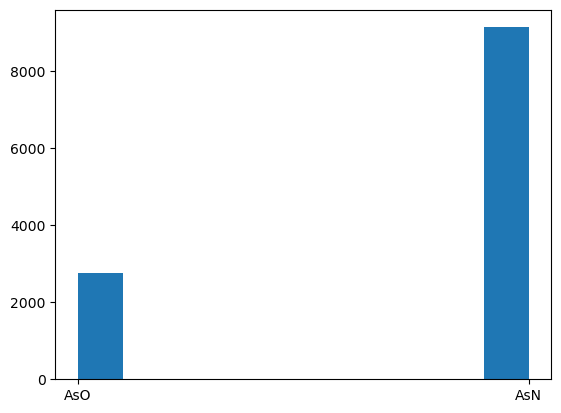

In [8]:
# Histogramme des classes
plt.hist(assu['Asvi'])

# Encodage des variables à deux modalités en variables binaires 

In [9]:
assu['Sexe']=assu['Sexe'].astype('category')
assu['Sex_num'] = assu['Sexe'].cat.codes 
# On enlève la colonne du sexe car elle ne sert plus à rien. 
del assu['Sexe']

In [10]:
assu['Couple']=assu['Couple'].astype('category')
assu['Couple_num'] = assu['Couple'].cat.codes 
# On enlève la colonne Couple  car elle ne sert plus à rien. 
del assu['Couple']

In [11]:
assu['Herit']=assu['Herit'].astype('category')
assu['Herit_num'] = assu['Herit'].cat.codes 
# On enlève la colonne Herit  car elle ne sert plus à rien. 
del assu['Herit']

In [12]:
assu['Jgrav']=assu['Jgrav'].astype('category')
assu['Jgrav_num'] = assu['Jgrav'].cat.codes 
# On enlève la colonne Jgrav car elle ne sert plus à rien. 
del assu['Jgrav']

In [13]:
assu['Livep']=assu['Livep'].astype('category')
assu['Livep_num'] = assu['Livep'].cat.codes 
# On enlève la colonne Livep car elle ne sert plus à rien. 
del assu['Livep']

In [14]:
assu['Epalo']=assu['Epalo'].astype('category')
assu['Epalo_num'] = assu['Epalo'].cat.codes 
# On enlève la colonne Epalo car elle ne sert plus à rien. 
del assu['Epalo']

In [15]:
assu['qpep']=assu['qpep'].astype('category')
assu['qpep_num'] = assu['qpep'].cat.codes 
# On enlève la colonne dqpep car elle ne sert plus à rien. 
del assu['qpep']

In [16]:
assu['vmob']=assu['vmob'].astype('category')
assu['vmob_num'] = assu['vmob'].cat.codes 
# On enlève la colonne vmob car elle ne sert plus à rien. 
del assu['vmob']

In [17]:
assu['asdecv']=assu['asdecv'].astype('category')
assu['asdecv_num'] = assu['asdecv'].cat.codes 
# On enlève la colonne asdecv car elle ne sert plus à rien. 
del assu['asdecv']

In [18]:
assu['Retrait']=assu['Retrait'].astype('category')
assu['Retrait_num'] = assu['Retrait'].cat.codes 
# On enlève la colonne Retrait car elle ne sert plus à rien. 
del assu['Retrait']

In [19]:
assu['livdf']=assu['livdf'].astype('category')
assu['livdf_num'] = assu['livdf'].cat.codes 
# On enlève la colonne livdf car elle ne sert plus à rien. 
del assu['livdf']

In [20]:
assu['pel']=assu['pel'].astype('category')
assu['pel_num'] = assu['pel'].cat.codes 
# On enlève la colonne pel car elle ne sert plus à rien. 
del assu['pel']

In [21]:
assu['cel']=assu['cel'].astype('category')
assu['cel_num'] = assu['cel'].cat.codes 
# On enlève la colonne cel car elle ne sert plus à rien. 
del assu['cel']

In [22]:
assu['terre']=assu['terre'].astype('category')
assu['terre_num'] = assu['terre'].cat.codes 
# On enlève la colonne terre car elle ne sert plus à rien. 
del assu['terre']

In [23]:
assu['dette']=assu['dette'].astype('category')
assu['dette_num'] = assu['dette'].cat.codes 
# On enlève la colonne dette car elle ne sert plus à rien. 
del assu['dette']

In [24]:
assu['bdetre']=assu['bdetre'].astype('category')
assu['bdetre_num'] = assu['bdetre'].cat.codes 
# On enlève la colonne bdetre car elle ne sert plus à rien. 
del assu['bdetre']

In [25]:
assu['hdetvo']=assu['hdetvo'].astype('category')
assu['hdetvo_num'] = assu['hdetvo'].cat.codes 
# On enlève la colonne hdetvo car elle ne sert plus à rien. 
del assu['hdetvo']

In [26]:
assu['Iogoc']=assu['Iogoc'].astype('category')
assu['Iogoc_num'] = assu['Iogoc'].cat.codes 
# On enlève la colonne Iogoc car elle ne sert plus à rien. 
del assu['Iogoc']

In [27]:
assu['Pere']=assu['Pere'].astype('category')
assu['Pere_num'] = assu['Pere'].cat.codes 
# On enlève la colonne Pere car elle ne sert plus à rien. 
del assu['Pere']

In [28]:
assu['Mere']=assu['Mere'].astype('category')
assu['Mere_num'] = assu['Mere'].cat.codes 
# On enlève la colonne Mere car elle ne sert plus à rien. 
del assu['Mere']

In [29]:
assu['Gparp']=assu['Gparp'].astype('category')
assu['Gparp_num'] = assu['Gparp'].cat.codes 
# On enlève la colonne Gparp car elle ne sert plus à rien. 
del assu['Gparp']

In [30]:
assu['gparm']=assu['gparm'].astype('category')
assu['gparm_num'] = assu['gparm'].cat.codes 
# On enlève la colonne dgparm car elle ne sert plus à rien. 
del assu['gparm']

In [31]:
assu['statut']=assu['statut'].astype('category')
assu['statut_num'] = assu['statut'].cat.codes 
# On enlève la colonne statut car elle ne sert plus à rien. 
del assu['statut']

In [32]:
assu['fepsal']=assu['fepsal'].astype('category')
assu['fepsal_num'] = assu['fepsal'].cat.codes 
# On enlève la colonne fepsal car elle ne sert plus à rien. 
del assu['fepsal']


In [33]:
assu['Qpea']=assu['Qpea'].astype('category')
assu['Qpea_num'] = assu['Qpea'].cat.codes 
# On enlève la colonne Qpea car elle ne sert plus à rien. 
del assu['Qpea']

cols_to_delete = []
assu.drop(columns = cols_to_delete, inplace = True)

# Verification des correlations et tri des données

<AxesSubplot:>

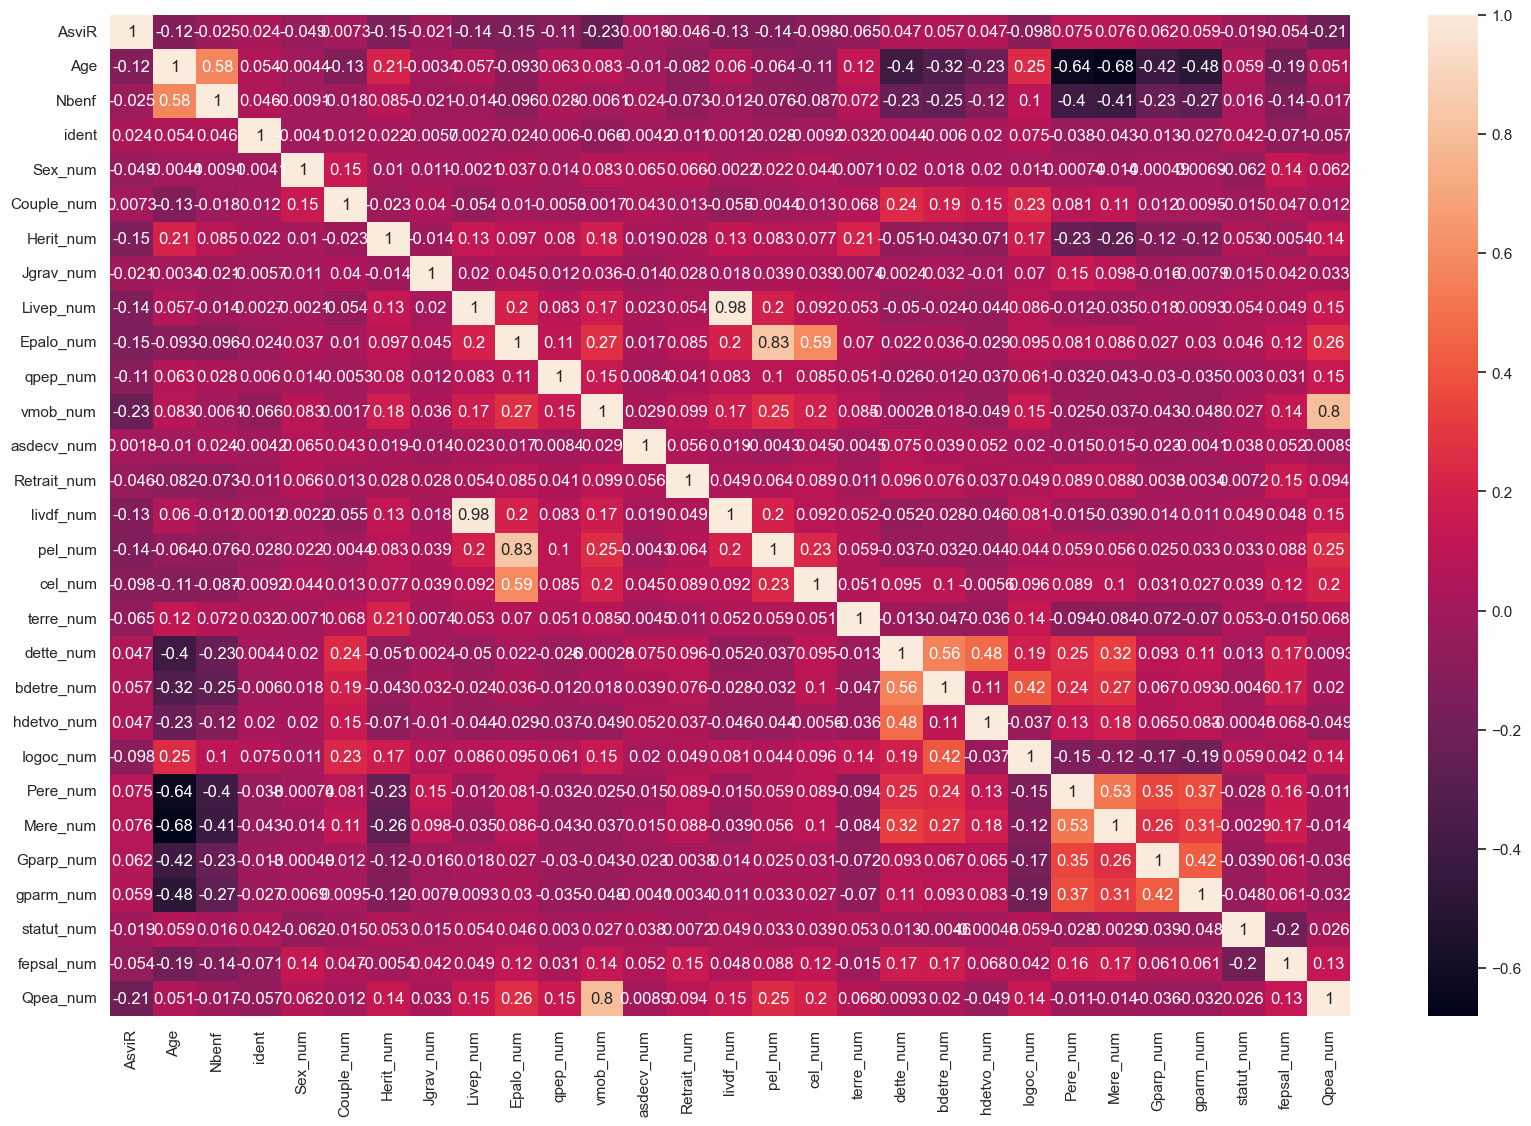

In [34]:
#Il faut mtn verifier que le choix des variables et coherent en constatant leurs liens avec la variable y 
# Matrice des corrélations
matrice_corr=assu.corr()
# On va l'afficher avec Seaborn 
sns.set(rc = {'figure.figsize':(20,13)})
sns.heatmap(matrice_corr,annot=True)

In [35]:
#Nous supprimons nbenf et age car nous avons les memes variables en categorielles
#Nous supprimons ident car non informatif
#Nous supprimons Asvi car nous avons la meme variable en binaire
#nous supprimons egalement livdf car tres correlé avec Livep (0.98). Les deux variables apportent quasiment la meme information

In [36]:
del assu['livdf_num']
del assu['Age']
del assu['ident']
del assu['Asvi']
del assu['Nbenf']

# Transformation des variables categorielles en differentes variables binaires + verification des corrélations et tri

In [37]:
# Fonction qui compte le nombre d'instances d'un feature
def freq_feature(feature):
    print('Nombre d\'instances du feature ', feature, ': ',assu[feature].nunique())
    print('Fréquences : \n',assu[feature].value_counts()/len(assu))

# Fonction qui fait un OneHot encoding de ces instances et qui les corrèle avec la gravité des accidents
def corr_features(feature,dim_fig):
    toto=pd.get_dummies(assu[feature])
    toto['AsviR']=assu['AsviR']
    sns.set(rc = {'figure.figsize':(dim_fig,dim_fig)})
    sns.heatmap(toto.corr(),annot=True)

Nombre d'instances du feature  Tage :  6
Fréquences : 
 T50    0.205939
T40    0.204173
T60    0.190965
T80    0.158661
T70    0.141415
T30    0.098847
Name: Tage, dtype: float64


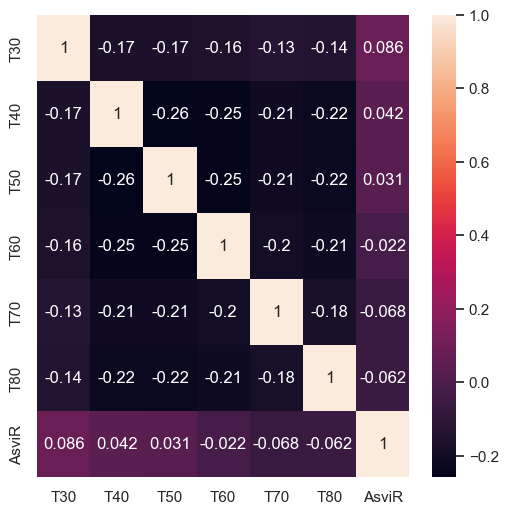

In [38]:
freq_feature('Tage')
corr_features('Tage', 6)

Commentaire: Nous notons que la variable la plus corrélée avec le y est T30

In [39]:
#Nous gardons toutes les variables

Tage = pd.get_dummies(assu['Tage'])
assu['T30']= Tage['T30']
assu['T40']= Tage['T40']
assu['T50']= Tage['T50']
assu['T60']= Tage['T60']
assu['T70']= Tage['T70']
assu['T80']= Tage['T80']

#On supprime la variable de base car elle n'est plus utile

del assu['Tage']

Tage.describe()

,T30,T40,T50,T60,T70,T80
count,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.098847,0.204173,0.205939,0.190965,0.141415,0.158661
std,0.298470,0.403113,0.404403,0.393078,0.348464,0.365375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nombre d'instances du feature  Vmatri :  3
Fréquences : 
 Vmar    0.638260
Vcel    0.200976
Vsep    0.160764
Name: Vmatri, dtype: float64


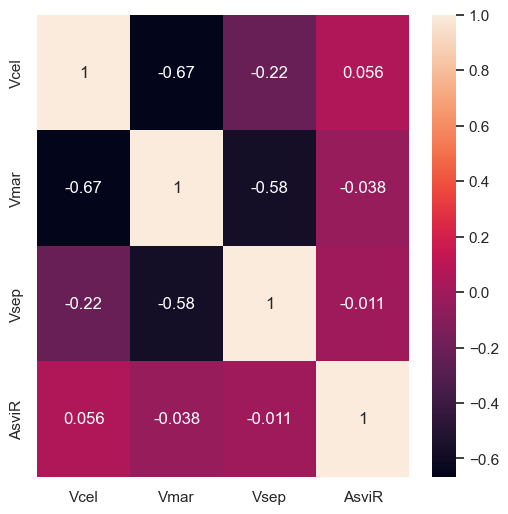

In [40]:
freq_feature('Vmatri')
corr_features('Vmatri', 6)

In [41]:
#Nous gardons toutes les variables 

Vmatri = pd.get_dummies(assu['Vmatri'])
assu['Vcel']= Vmatri['Vcel']
assu['Vmar']= Vmatri['Vmar']
assu['Vsep']= Vmatri['Vsep']
#on supprime la variable de base car plus utile
del assu['Vmatri']
Vmatri.describe()

,Vcel,Vmar,Vsep
count,11887.000000,11887.000000,11887.000000
mean,0.200976,0.638260,0.160764
std,0.400747,0.480524,0.367328
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


Nombre d'instances du feature  Diplome :  7
Fréquences : 
 Dtec     0.242870
Db+5     0.153781
Dsan     0.140321
Dbac     0.137966
Dcep     0.133423
Db+2     0.124253
Dbepc    0.067385
Name: Diplome, dtype: float64


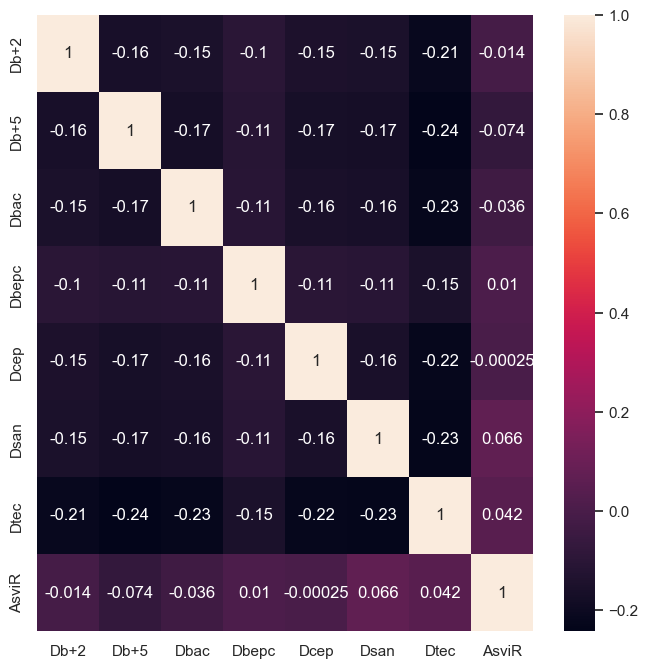

In [42]:
freq_feature('Diplome')
corr_features('Diplome', 8)

Commentaire: Dcep tres peu corrélé avec y
Dpec peu frequenté

In [43]:
assu.Diplome.replace(['Dbepc', 'Dbac+2'], 'Dbac+2bepc',inplace=True)

In [44]:
#On supprime Dcep car Très peu corrélé et on combine Dbepc avec Dbac car peu frequenté

Diplome = pd.get_dummies(assu['Diplome'])

assu['Db+5']= Diplome['Db+5']
assu['Dbac+2bepc']= Diplome['Dbac+2bepc']
assu['Dbac']= Diplome['Dbac']
assu['Dsan']= Diplome['Dsan']
assu['Dtec']= Diplome['Dtec']
del assu['Diplome']
Diplome.describe()

,Db+2,Db+5,Dbac,Dbac+2bepc,Dcep,Dsan,Dtec
count,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.124253,0.153781,0.137966,0.067385,0.133423,0.140321,0.242870
std,0.329884,0.360754,0.344879,0.250697,0.340046,0.347335,0.428835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nombre d'instances du feature  Occupa :  3
Fréquences : 
 Oact    0.565239
Oret    0.290317
Oina    0.144444
Name: Occupa, dtype: float64


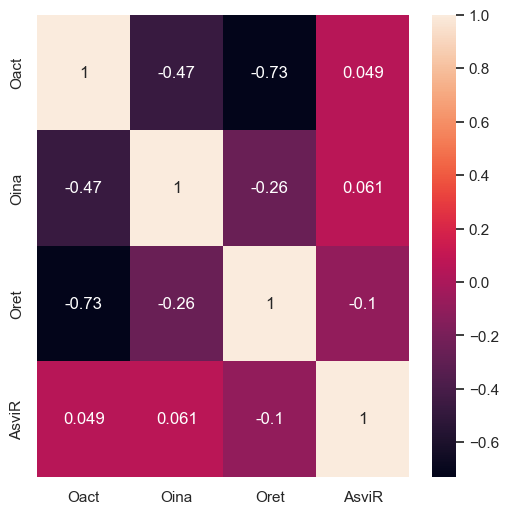

In [45]:
freq_feature('Occupa')
corr_features('Occupa', 6)

Commentaire: Nous notons que Oret est la variable la plus corrélée avec y 

In [46]:
#On garde toutes les variables
Occupa = pd.get_dummies(assu['Occupa'])
assu['Oact']= Occupa['Oact']
assu['Oina']= Occupa['Oina']
assu['Oret']= Occupa['Oret']
del assu['Occupa']

Occupa.describe()

,Oact,Oina,Oret
count,11887.000000,11887.000000,11887.000000
mean,0.565239,0.144444,0.290317
std,0.495746,0.351554,0.453928
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


Nombre d'instances du feature  Work :  4
Fréquences : 
 Wemp    0.388912
WctC    0.279801
WctA    0.223101
WctB    0.108185
Name: Work, dtype: float64


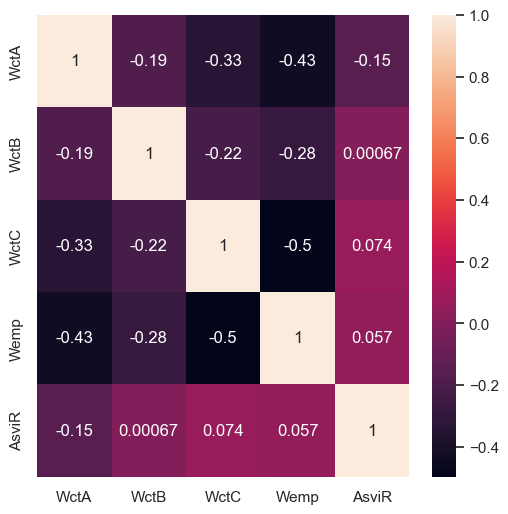

In [47]:
freq_feature('Work')
corr_features('Work', 6)

WctB tres peu corrélé avec le y 

In [48]:
#On ne prend pas WctB car très peu corrélé
Work = pd.get_dummies(assu['Work'])
assu['WctA']= Work['WctA']
assu['WctC']= Work['WctC']
assu['Wemp']= Work['Wemp']
del assu['Work']
Work.describe()

,WctA,WctB,WctC,Wemp
count,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.223101,0.108185,0.279801,0.388912
std,0.416343,0.310628,0.448920,0.487524
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Nombre d'instances du feature  Urbani :  5
Fréquences : 
 U4    0.355262
U1    0.205771
U5    0.177841
U2    0.150164
U3    0.110962
Name: Urbani, dtype: float64


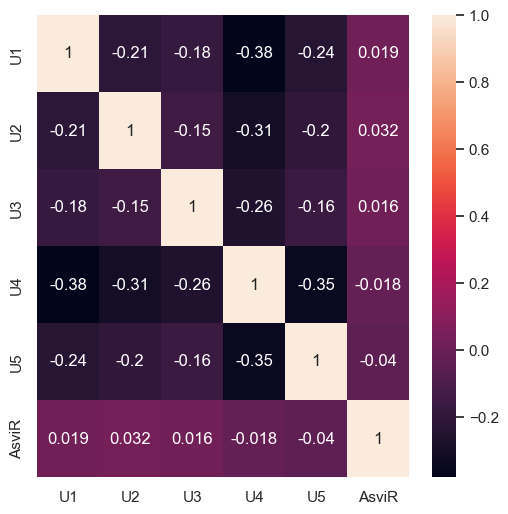

In [49]:
freq_feature('Urbani')
corr_features('Urbani', 6)

In [50]:
#On garde toutes les variables
Urbani = pd.get_dummies(assu['Urbani'])
assu['U1']= Urbani['U1']
assu['U2']= Urbani['U2']
assu['U3']= Urbani['U3']
assu['U4']= Urbani['U4']
assu['U5']= Urbani['U5']
del assu['Urbani']
Urbani.describe()

,U1,U2,U3,U4,U5
count,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.205771,0.150164,0.110962,0.355262,0.177841
std,0.404281,0.357247,0.314098,0.478613,0.382395
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Nombre d'instances du feature  Zeat :  7
Fréquences : 
 Zidf    0.202658
Zpar    0.164550
Zne     0.157651
Zou     0.137293
Zmed    0.116514
Zso     0.115841
Zce     0.105493
Name: Zeat, dtype: float64


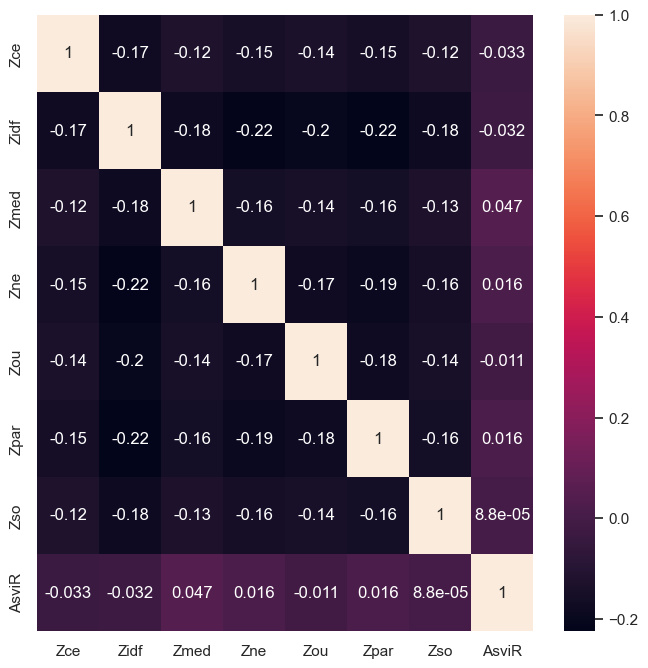

In [51]:
freq_feature('Zeat')
corr_features('Zeat', 8)

Commentaire : On ne garde pas Zso car trop peu correlé

In [52]:
#On ne garde pas Zso car trop peu correlé
Zeat = pd.get_dummies(assu['Zeat'])
assu['Zce']= Zeat['Zce']
assu['Zidf']= Zeat['Zidf']
assu['Zmed']= Zeat['Zmed']
assu['Zne']= Zeat['Zne']
assu['Zou']= Zeat['Zou']
assu['Zpar']= Zeat['Zpar']

del assu['Zeat']
Zeat.describe()

,Zce,Zidf,Zmed,Zne,Zou,Zpar,Zso
count,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.105493,0.202658,0.116514,0.157651,0.137293,0.164550,0.115841
std,0.307201,0.401997,0.320854,0.364429,0.344171,0.370789,0.320047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nombre d'instances du feature  Nbenfq :  4
Fréquences : 
 Nbe0    0.501472
Nbe2    0.173803
Nbe1    0.167494
Nb>3    0.157231
Name: Nbenfq, dtype: float64


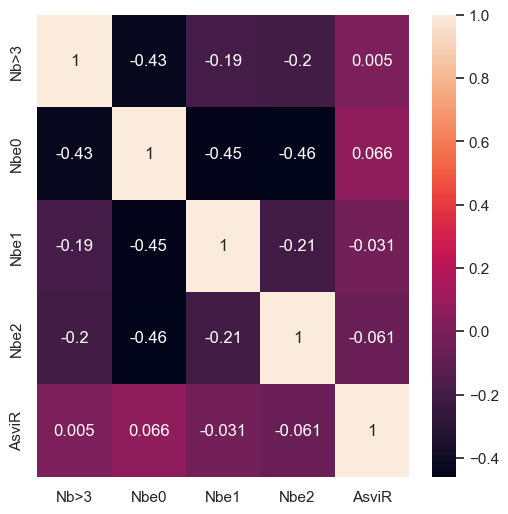

In [53]:
freq_feature('Nbenfq')
corr_features('Nbenfq', 6)

In [54]:
#Nb>3 peu corrélé donc on ne le garde pas

Nbenfq = pd.get_dummies(assu['Nbenfq'])

assu['Nbe0']= Nbenfq['Nbe0']
assu['Nbe1']= Nbenfq['Nbe1']
assu['Nbe2']= Nbenfq['Nbe2']
del assu['Nbenfq']
Nbenfq.describe()

,Nb>3,Nbe0,Nbe1,Nbe2
count,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.157231,0.501472,0.167494,0.173803
std,0.364033,0.500019,0.373432,0.378956
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


# On Visualise la base finale

In [55]:
assu

,AsviR,Sex_num,Couple_num,Herit_num,Jgrav_num,Livep_num,Epalo_num,qpep_num,vmob_num,asdecv_num,...,U5,Zce,Zidf,Zmed,Zne,Zou,Zpar,Nbe0,Nbe1,Nbe2
0,0,1,1,1,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
3,1,0,1,0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11882,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11883,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11884,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
11885,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [56]:
#Nous constatons aucun NaN et toutes les variables sont désormais numériques
assu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11887 entries, 0 to 11886
Data columns (total 59 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AsviR        11887 non-null  int64
 1   Sex_num      11887 non-null  int8 
 2   Couple_num   11887 non-null  int8 
 3   Herit_num    11887 non-null  int8 
 4   Jgrav_num    11887 non-null  int8 
 5   Livep_num    11887 non-null  int8 
 6   Epalo_num    11887 non-null  int8 
 7   qpep_num     11887 non-null  int8 
 8   vmob_num     11887 non-null  int8 
 9   asdecv_num   11887 non-null  int8 
 10  Retrait_num  11887 non-null  int8 
 11  pel_num      11887 non-null  int8 
 12  cel_num      11887 non-null  int8 
 13  terre_num    11887 non-null  int8 
 14  dette_num    11887 non-null  int8 
 15  bdetre_num   11887 non-null  int8 
 16  hdetvo_num   11887 non-null  int8 
 17  Iogoc_num    11887 non-null  int8 
 18  Pere_num     11887 non-null  int8 
 19  Mere_num     11887 non-null  int8 
 20  Gparp_

In [57]:
assu.describe()

,AsviR,Sex_num,Couple_num,Herit_num,Jgrav_num,Livep_num,Epalo_num,qpep_num,vmob_num,asdecv_num,...,U5,Zce,Zidf,Zmed,Zne,Zou,Zpar,Nbe0,Nbe1,Nbe2
count,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,...,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000,11887.000000
mean,0.768234,0.459998,0.763523,0.295617,0.609489,0.733827,0.348364,0.070497,0.208295,0.105157,...,0.177841,0.105493,0.202658,0.116514,0.157651,0.137293,0.164550,0.501472,0.167494,0.173803
std,0.421978,0.498418,0.424936,0.456339,0.487885,0.441974,0.476472,0.255994,0.406106,0.306768,...,0.382395,0.307201,0.401997,0.320854,0.364429,0.344171,0.370789,0.500019,0.373432,0.378956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# SCIKIT LEARN REGRESSION LOGISTIQUE

Importation des packages necessaires

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [59]:
seed=42

# Separation de la base de donnée pour avoir une base d'entrainement et une base de test

In [60]:
# Training : le tableau des attributs
features = assu.columns.values.tolist()
features.remove('AsviR')

X = assu.loc[:, features]
y= assu['AsviR']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
#on aura 80% de la base pour le training et 20% pour le testing

In [62]:
prop_avir = sum(y_train)/len(y_train)
prop_avir
#Ici on remarque que la proportion de personnes assurés est bien plus importante que la proportion de personnes non assurées.
#Les données sont donc déséquilibrées

0.7668524555684089

#Nous procédons donc à un réechantillonage avant de lancer notre modele
#Ce qui consiste à "gonfler artifficiellement la categorie sous representée"
seed=22
X2 =X_train
X2['assu'] = y_train.values

minority = X2[X2.assu ==1]
majority = X2[X2.assu ==0]

minority_upsampled= resample(minority, replace = True, n_samples= len(majority), random_state=seed)

upsampled= pd.concat([majority,minority_upsampled])
upsampled

#on verifie si tout est bon 

upsampled['assu'].value_counts()

X_trainup = upsampled.drop('assu', axis=1)
y_trainup = upsampled['assu']

# Entrainement du modele 

In [63]:
#Definition de la fonction de regression 
lr = LogisticRegression(penalty='l2',C=1.0,solver='liblinear',max_iter=100)

# Entrainement du modele 

lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# Prédiction du modele

In [64]:
yhard = lr.predict(X_test)
ysoft = lr.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, yhard)

print("Score estimation = ", score)


Score estimation =  0.7867956265769555


In [65]:
#Le modele predit mieux qu'un modele aleatoire mais le score pourrait être meilleur

# Evaluation du modele avec la courbe ROC et Log Loss 

AUC =  0.7111574672700824


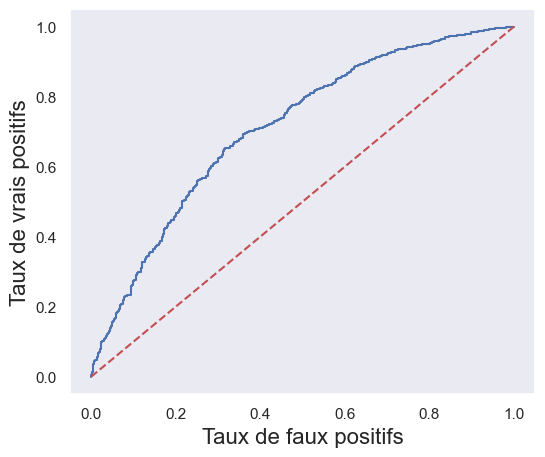

In [66]:
# Courbe ROC
sns.set(rc = {'figure.figsize':(6,5)})
from sklearn.metrics import roc_curve
pfa, power, _ = roc_curve(y_test, ysoft)
plt.plot(pfa, power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taux de faux positifs', fontsize=16);
plt.ylabel('Taux de vrais positifs', fontsize=16);

from sklearn.metrics import roc_auc_score
print('AUC = ', roc_auc_score(y_test, ysoft))

In [67]:
# Le log loss
from sklearn.metrics import log_loss
print("log loss =", log_loss(y_test, ysoft))

log loss = 0.4824015751138468


# Estimation d'un deuxieme modele : Random forest


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
# Commençons par une forêt aléatoire sur des arbres complets
rf = RandomForestClassifier(n_estimators=300)  # On moyenne sur 300 arbres
rf.fit(X_train, y_train)

# Score du Random Forest
yhard = rf.predict(X_test)
score=accuracy_score(y_test, yhard)

print("Score du Random Forest = ", score)

Score du Random Forest =  0.7880571909167368


In [70]:
yy = rf.predict(X_train)
score=accuracy_score(y_train, yy)
print(score)

0.9994741823535598


Commentaire : <br> En verifiant les performances du modele sur les données d'entrainement, nous constatons que le modele est très performant (0.999). <br>Cela signifie que le modele sur-apprend. Il s'adapte trop aux données d'entrainement, jusqu'a capturer ses fluctuations.
<br>Il nous faut donc remedier à ce problème.

In [71]:
# On s'arrête de subdiviser un noeud dès qu'il contient moins de 50 échantillons, auquel cas il devient une feuille. 
rf = RandomForestClassifier(min_samples_split=50, n_estimators=200)  
rf.fit(X_train, y_train)

# Score du Random Forest
yhard_rf = rf.predict(X_test)
ysoft_rf = rf.predict_proba(X_test)[:,1]
score=accuracy_score(y_test, yhard_rf)

print("Score du Random Forest amélioré = ", score)

# Essayons encore sur les données d'apprentissage 
yy = rf.predict(X_train)
score=accuracy_score(y_train, yy)
print("Score sur les données d\'apprentissage = ", score)

# AUC
ysoft_rf = rf.predict_proba(X_test)[:,1]
print('AUC = ', roc_auc_score(y_test, ysoft_rf))

Score du Random Forest amélioré =  0.7855340622371741
Score sur les données d'apprentissage =  0.7929330108318435
AUC =  0.7134889688055601


# Arbre de décision

Importation des données

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [73]:
dt_model = DecisionTreeClassifier(random_state=seed) 
dt_model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [74]:
y_pred_train = dt_model.predict(X_train)  # Prédictions sur les données d'entraînement
accuracy_train = accuracy_score(y_train, y_pred_train)  # Calculer la précision sur les données d'entraînement
print("Accuracy on training set:", accuracy_train)

y_pred_test = dt_model.predict(X_test)  # Prédictions sur les données de test
accuracy_test = accuracy_score(y_test, y_pred_test)  # Calculer la précision sur les données de test
print("Accuracy on test set:", accuracy_test)

Accuracy on training set: 0.9994741823535598
Accuracy on test set: 0.6799831791421362


On constate que le modele sur apprend, il faut donc lajuster

In [75]:
# Appliquer la de réduction de la complexité de l'arbre en limitant la profondeur maximale
dt_model_depth_limit = DecisionTreeClassifier(max_depth=4, random_state=seed)
dt_model_depth_limit.fit(X_train, y_train)

# Prédictions sur les données d'entraînement et de test avec l'arbre de décision ajusté
y_pred_train_depth_limit = dt_model_depth_limit.predict(X_train)
y_pred_test_depth_limit = dt_model_depth_limit.predict(X_test)
ysoft_dt = dt_model_depth_limit.predict_proba(X_test)[:, 1]

# Calculer la précision de l'arbre de décision ajusté
accuracy_train_depth_limit = accuracy_score(y_train, y_pred_train_depth_limit)
accuracy_test_depth_limit = accuracy_score(y_test, y_pred_test_depth_limit)

print("Score du Modele ajusté sur données d'entrainement:", accuracy_train_depth_limit)
print("Score du Modele ajusté sur données de test:", accuracy_test_depth_limit)

Score du Modele ajusté sur données d'entrainement: 0.7727416132085393
Score du Modele ajusté sur données de test: 0.7716568544995794


Commentaire : le modele ne sur-apprend plus et son score est correct mais similaire aux autres modeles

# Evaluation du modele avec la courbe ROC

AUC =  0.6740837643445935


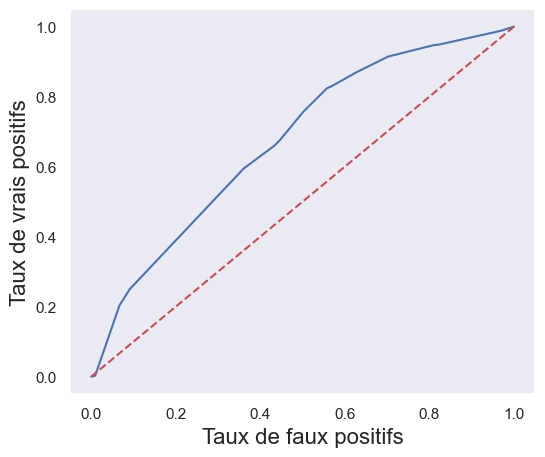

In [76]:
sns.set(rc = {'figure.figsize':(6,5)})
from sklearn.metrics import roc_curve
pfa, power, _ = roc_curve(y_test, ysoft_dt)
plt.plot(pfa, power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taux de faux positifs', fontsize=16);
plt.ylabel('Taux de vrais positifs', fontsize=16);

print('AUC = ', roc_auc_score(y_test, ysoft_dt))

# Comparaison des modeles

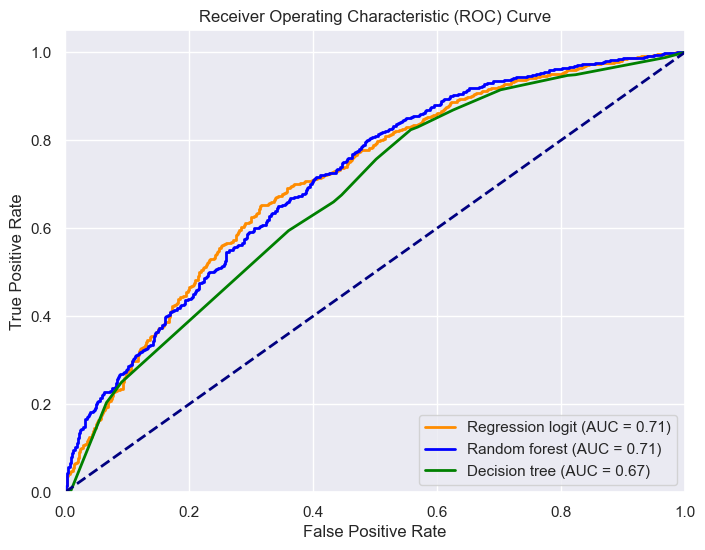

In [77]:
# Calcul du taux de faux positifs (fpr) et les taux de vrais positifs (tpr) ainsi que l'aire sous la courbe ROC (AUC) pour chaque modèle
fpr_model1, tpr_model1, _ = roc_curve(y_test, ysoft)
roc_auc_model1 = auc(fpr_model1, tpr_model1)

fpr_model2, tpr_model2, _ = roc_curve(y_test, ysoft_rf)
roc_auc_model2 = auc(fpr_model2, tpr_model2)

fpr_model3, tpr_model3, _ = roc_curve(y_test, ysoft_dt)
roc_auc_model3 = auc(fpr_model3, tpr_model3)

# Tracage des courbes ROC pour chaque modèle
plt.figure(figsize=(8, 6))

plt.plot(fpr_model1, tpr_model1, color='darkorange', lw=2, label='Regression logit (AUC = %0.2f)' % roc_auc_model1)
plt.plot(fpr_model2, tpr_model2, color='blue', lw=2, label='Random forest (AUC = %0.2f)' % roc_auc_model2)
plt.plot(fpr_model3, tpr_model3, color='green', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_model3)


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Ici nous constatons que le modele le moins performant au regard de la courbe roc est le modele d'arbre de decision.
Les modeles de regression logistique et Random forest eux, se valent car leur score est égale.
Nous pourrons donc choisir un des deux pour etablir le score d'attrition

# Affichage du score d'attrition pour chaque individu Grace au logit

In [78]:
test = X_test.copy()
test['score attrition']= ysoft
test['AsviR']=y_test
test

,Sex_num,Couple_num,Herit_num,Jgrav_num,Livep_num,Epalo_num,qpep_num,vmob_num,asdecv_num,Retrait_num,...,Zidf,Zmed,Zne,Zou,Zpar,Nbe0,Nbe1,Nbe2,score attrition,AsviR
10385,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.875870,1
3323,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.820835,1
11036,1,0,1,1,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0.390895,0
7586,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.855540,0
5027,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.831851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11306,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.828252,1
4850,1,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0.695534,0
5304,1,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.804506,1
10997,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0.785701,1


# Affichage du score d'attrition de chaque individu grace au random forest

In [79]:
testrf= X_test.copy()
testrf['score client']= ysoft_rf
testrf['AsviR']=y_test
testrf

,Sex_num,Couple_num,Herit_num,Jgrav_num,Livep_num,Epalo_num,qpep_num,vmob_num,asdecv_num,Retrait_num,...,Zidf,Zmed,Zne,Zou,Zpar,Nbe0,Nbe1,Nbe2,score client,AsviR
10385,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.851949,1
3323,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.860470,1
11036,1,0,1,1,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0.476597,0
7586,1,1,0,1,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0.889448,0
5027,0,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.791869,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11306,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.829396,1
4850,1,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0.673744,0
5304,1,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0.761197,1
10997,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0.636526,1
